In [1]:
import pyspark
from pyspark.sql import SparkSession

from pyspark.sql.functions import *

spark = SparkSession.builder.getOrCreate()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#df = spark.read.format("csv").option("header", "true").option("delimiter", ";").load("hdfs://elephant:8020/user/labdata/vazoes.csv")

In [4]:
# local
df = spark \
    .read \
    .csv("base_final.csv", header=True, sep=",", inferSchema=True) \
    .withColumn("volume_vazao", regexp_replace(col("volume_vazao"), ",", ".").cast("float")) \
    .withColumn("volume_chuva", regexp_replace(col("volume_chuva"), ",", ".").cast("float")) \
    .withColumn("data", to_date("data", "dd/MM/yyyy")) \
    .withColumn("flag_ong", when(col("data") > "2005-12-31",1).otherwise(0))
     
# Cluster
#df = spark.read.csv("hdfs://elephant:8020/user/labdata/chuvas.csv",header=True, sep=";", inferSchema=True) 

In [5]:
df.show(10,False)

+----------+------------+------------+--------+----------------------+
|data      |volume_chuva|volume_vazao|flag_ong|data_inclusao_registro|
+----------+------------+------------+--------+----------------------+
|1990-01-01|25.9        |12.094      |0       |2019-05-14 00:00:00   |
|1990-01-02|39.3        |16.256      |0       |2019-05-14 00:00:00   |
|1990-01-03|19.4        |22.729      |0       |2019-05-14 00:00:00   |
|1990-01-04|0.3         |16.871      |0       |2019-05-14 00:00:00   |
|1990-01-05|29.4        |15.269      |0       |2019-05-14 00:00:00   |
|1990-01-06|0.0         |9.324       |0       |2019-05-14 00:00:00   |
|1990-01-07|19.3        |9.324       |0       |2019-05-14 00:00:00   |
|1990-01-08|0.0         |6.836       |0       |2019-05-14 00:00:00   |
|1990-01-09|0.0         |5.115       |0       |2019-05-14 00:00:00   |
|1990-01-10|6.1         |5.28        |0       |2019-05-14 00:00:00   |
+----------+------------+------------+--------+----------------------+
only s

In [6]:
df.printSchema()

root
 |-- data: date (nullable = true)
 |-- volume_chuva: float (nullable = true)
 |-- volume_vazao: float (nullable = true)
 |-- flag_ong: integer (nullable = false)
 |-- data_inclusao_registro: timestamp (nullable = true)



In [7]:
df.groupBy("data").count().orderBy("data").show()

+----------+-----+
|      data|count|
+----------+-----+
|      null|  226|
|1990-01-01|    2|
|1990-01-02|    2|
|1990-01-03|    2|
|1990-01-04|    2|
|1990-01-05|    2|
|1990-01-06|    2|
|1990-01-07|    2|
|1990-01-08|    2|
|1990-01-09|    2|
|1990-01-10|    2|
|1990-01-11|    2|
|1990-01-12|    2|
|1990-01-13|    2|
|1990-01-14|    2|
|1990-01-15|    2|
|1990-01-16|    2|
|1990-01-17|    2|
|1990-01-18|    2|
|1990-01-19|    2|
+----------+-----+
only showing top 20 rows



In [8]:
df = df.distinct()

In [9]:
df.groupBy("data").count().orderBy("data").show()

+----------+-----+
|      data|count|
+----------+-----+
|      null|   34|
|1990-01-01|    1|
|1990-01-02|    1|
|1990-01-03|    1|
|1990-01-04|    1|
|1990-01-05|    1|
|1990-01-06|    1|
|1990-01-07|    1|
|1990-01-08|    1|
|1990-01-09|    1|
|1990-01-10|    1|
|1990-01-11|    1|
|1990-01-12|    1|
|1990-01-13|    1|
|1990-01-14|    1|
|1990-01-15|    1|
|1990-01-16|    1|
|1990-01-17|    1|
|1990-01-18|    1|
|1990-01-19|    1|
+----------+-----+
only showing top 20 rows



In [10]:
df.describe().show()

+-------+-----------------+------------------+------------------+
|summary|     volume_chuva|      volume_vazao|          flag_ong|
+-------+-----------------+------------------+------------------+
|  count|             8709|              8708|              8742|
|   mean|3.555712473043099|2.8797592955735993|0.3310455273392816|
| stddev| 9.15896301095638|3.5588845480328724|0.4706163206898334|
|    min|              0.0|             0.461|                 0|
|    max|            146.5|            77.052|                 1|
+-------+-----------------+------------------+------------------+



In [11]:
df.summary().show()

+-------+-----------------+------------------+------------------+
|summary|     volume_chuva|      volume_vazao|          flag_ong|
+-------+-----------------+------------------+------------------+
|  count|             8709|              8708|              8742|
|   mean|3.555712473043099|2.8797592955735993|0.3310455273392816|
| stddev| 9.15896301095638|3.5588845480328724|0.4706163206898334|
|    min|              0.0|             0.461|                 0|
|    25%|              0.0|             1.236|                 0|
|    50%|              0.0|             1.861|                 0|
|    75%|              2.0|             3.189|                 1|
|    max|            146.5|            77.052|                 1|
+-------+-----------------+------------------+------------------+



In [12]:
#correlacao chuva e vazao
df.corr('flag_ong','volume_vazao', 'pearson')

0.004511843447193849

In [13]:
df.filter(col("data") >= "2005-12-25").orderBy("data").show()

+----------+------------+------------+--------+----------------------+
|      data|volume_chuva|volume_vazao|flag_ong|data_inclusao_registro|
+----------+------------+------------+--------+----------------------+
|2005-12-25|         0.0|       2.631|       0|   2019-05-14 00:00:00|
|2005-12-26|         0.0|       2.266|       0|   2019-05-14 00:00:00|
|2005-12-27|         0.0|       2.196|       0|   2019-05-14 00:00:00|
|2005-12-28|         0.0|       2.127|       0|   2019-05-14 00:00:00|
|2005-12-29|         0.0|       1.926|       0|   2019-05-14 00:00:00|
|2005-12-30|         0.0|       1.734|       0|   2019-05-14 00:00:00|
|2005-12-31|         0.0|       2.127|       0|   2019-05-14 00:00:00|
|2006-01-01|        26.5|       3.435|       1|   2019-05-14 00:00:00|
|2006-01-02|        30.3|        4.61|       1|   2019-05-14 00:00:00|
|2006-01-03|        38.0|       5.197|       1|   2019-05-14 00:00:00|
|2006-01-04|        13.3|       5.817|       1|   2019-05-14 00:00:00|
|2006-

In [15]:
#Não vai precisar dessa linha porque eu fiz o distinct la em cima, aqui era só pra pegar de uma data que as
# linhas não tinham duplicidade
#df.filter(col("data") >= "2005-12-10").groupBy("data").count().orderBy("data").show()

In [14]:
df.groupBy("flag_ong").agg({'volume_chuva' : 'mean'}).show()

+--------+------------------+
|flag_ong| avg(volume_chuva)|
+--------+------------------+
|       1| 3.869616303903254|
|       0|3.3995701445220488|
+--------+------------------+



In [15]:
df.groupBy("flag_ong").agg({'volume_vazao' : 'mean'}).show()

+--------+------------------+
|flag_ong| avg(volume_vazao)|
+--------+------------------+
|       1|2.8913679919678668|
|       0| 2.873980904213948|
+--------+------------------+



# Train Test Split and Linear Regression

In [16]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

In [17]:
df.write.mode("overwrite").parquet("./teste.parquet")

In [18]:
df = spark.read.parquet("./teste.parquet") 
df.show(20)

+----------+------------+------------+--------+----------------------+
|      data|volume_chuva|volume_vazao|flag_ong|data_inclusao_registro|
+----------+------------+------------+--------+----------------------+
|1990-07-21|         0.0|       3.099|       0|   2019-05-14 00:00:00|
|1990-08-14|         0.0|       0.761|       0|   2019-05-14 00:00:00|
|1991-10-07|        61.2|      19.515|       0|   2019-05-14 00:00:00|
|1993-05-14|         0.0|       1.855|       0|   2019-05-14 00:00:00|
|1993-06-04|         0.0|       1.855|       0|   2019-05-14 00:00:00|
|1994-06-04|         0.0|       1.404|       0|   2019-05-14 00:00:00|
|1994-08-17|         0.0|       0.909|       0|   2019-05-14 00:00:00|
|1994-09-05|         2.0|       0.797|       0|   2019-05-14 00:00:00|
|1995-01-23|         0.0|       4.449|       0|   2019-05-14 00:00:00|
|1995-09-18|         0.0|       1.926|       0|   2019-05-14 00:00:00|
|1996-02-03|         0.0|       3.874|       0|   2019-05-14 00:00:00|
|1996-

In [19]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["flag_ong", "volume_chuva"],
    outputCol="features")

#tratamento de missing: df.na.fill(0)
output = assembler \
        .transform(df.na.fill(0)) \
        .withColumn("label", col("volume_vazao"))
          #.select(col("features"),col("label"))
         
output.show()

+----------+------------+------------+--------+----------------------+--------------------+------+
|      data|volume_chuva|volume_vazao|flag_ong|data_inclusao_registro|            features| label|
+----------+------------+------------+--------+----------------------+--------------------+------+
|1990-07-21|         0.0|       3.099|       0|   2019-05-14 00:00:00|           (2,[],[])| 3.099|
|1990-08-14|         0.0|       0.761|       0|   2019-05-14 00:00:00|           (2,[],[])| 0.761|
|1991-10-07|        61.2|      19.515|       0|   2019-05-14 00:00:00|[0.0,61.200000762...|19.515|
|1993-05-14|         0.0|       1.855|       0|   2019-05-14 00:00:00|           (2,[],[])| 1.855|
|1993-06-04|         0.0|       1.855|       0|   2019-05-14 00:00:00|           (2,[],[])| 1.855|
|1994-06-04|         0.0|       1.404|       0|   2019-05-14 00:00:00|           (2,[],[])| 1.404|
|1994-08-17|         0.0|       0.909|       0|   2019-05-14 00:00:00|           (2,[],[])| 0.909|
|1994-09-0

In [20]:
train, test = output.randomSplit([0.7, 0.3], seed=12345)

In [21]:
lr = LinearRegression(maxIter=100, regParam=0.0001)

In [22]:
# Run TrainValidationSplit, and choose the best set of parameters.
model = lr.fit(train)

In [23]:
# Make predictions on test data. model is the model with combination of parameters
# that performed best.
model.transform(test)\
    .filter(col("data") > "2000-01-01")\
    .show()
    #.select("features", "label", "prediction")\

+----------+------------+------------+--------+----------------------+--------------------+------+------------------+
|      data|volume_chuva|volume_vazao|flag_ong|data_inclusao_registro|            features| label|        prediction|
+----------+------------+------------+--------+----------------------+--------------------+------+------------------+
|2000-01-06|         9.4|      21.448|       0|   2019-05-14 00:00:00|[0.0,9.3999996185...|21.448|3.6045663773162757|
|2000-01-17|         0.0|        4.29|       0|   2019-05-14 00:00:00|           (2,[],[])|  4.29|2.4365849482586657|
|2000-02-08|        12.4|       3.608|       0|   2019-05-14 00:00:00|[0.0,12.399999618...| 3.608|3.9773264229938823|
|2000-02-18|        33.6|       6.375|       0|   2019-05-14 00:00:00|[0.0,33.599998474...| 6.375| 6.611497270252297|
|2000-03-12|         0.0|       3.608|       0|   2019-05-14 00:00:00|           (2,[],[])| 3.608|2.4365849482586657|
|2000-03-29|         0.0|       5.111|       0|   2019-0

# FLAG_ONG = 0

In [24]:
df_0 = spark \
      .read \
      .csv("base_final.csv", header=True, sep=",", inferSchema=True) \
      .withColumn("volume_vazao", regexp_replace(col("volume_vazao"), ",", ".").cast("float")) \
      .withColumn("volume_chuva", regexp_replace(col("volume_chuva"), ",", ".").cast("float")) \
      .withColumn("data", to_date("data", "dd/MM/yyyy")) \
      .withColumn("flag_ong", regexp_replace(col("flag_ong"), "1", "0").cast("int"))

In [25]:
df_0.groupBy(col("flag_ong")).count().show()

+--------+-----+
|flag_ong|count|
+--------+-----+
|       0|12586|
+--------+-----+



In [26]:
#from pyspark.ml.linalg import Vectors
#from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["flag_ong", "volume_chuva"],
    outputCol="features")

#tratamento de missing: df_0.na.fill(0)
output0 = assembler \
         .transform(df_0.na.fill(0)) \
         .withColumn("label", col("volume_vazao"))
          #.select(col("features"),col("label"))
         
output0.show()

+----------+------------+------------+--------+----------------------+--------------------+------+
|      data|volume_chuva|volume_vazao|flag_ong|data_inclusao_registro|            features| label|
+----------+------------+------------+--------+----------------------+--------------------+------+
|1990-01-01|        25.9|      12.094|       0|   2019-05-14 00:00:00|[0.0,25.899999618...|12.094|
|1990-01-02|        39.3|      16.256|       0|   2019-05-14 00:00:00|[0.0,39.299999237...|16.256|
|1990-01-03|        19.4|      22.729|       0|   2019-05-14 00:00:00|[0.0,19.399999618...|22.729|
|1990-01-04|         0.3|      16.871|       0|   2019-05-14 00:00:00|[0.0,0.3000000119...|16.871|
|1990-01-05|        29.4|      15.269|       0|   2019-05-14 00:00:00|[0.0,29.399999618...|15.269|
|1990-01-06|         0.0|       9.324|       0|   2019-05-14 00:00:00|           (2,[],[])| 9.324|
|1990-01-07|        19.3|       9.324|       0|   2019-05-14 00:00:00|[0.0,19.299999237...| 9.324|
|1990-01-0

In [27]:
# Make predictions on test data. model is the model with combination of parameters
# that performed best.
model.transform(output0)\
     .select("data", "features", "label", "prediction")\
     .show()

+----------+--------------------+------+------------------+
|      data|            features| label|        prediction|
+----------+--------------------+------+------------------+
|1990-01-01|[0.0,25.899999618...|12.094| 5.654746628543113|
|1990-01-02|[0.0,39.299999237...|16.256| 7.319741451837531|
|1990-01-03|[0.0,19.399999618...|22.729| 4.847099862908298|
|1990-01-04|[0.0,0.3000000119...|16.871|2.4738609543076415|
|1990-01-05|[0.0,29.399999618...|15.269| 6.089633348500321|
|1990-01-06|           (2,[],[])| 9.324|2.4365849482586657|
|1990-01-07|[0.0,19.299999237...| 9.324|4.8346744806534865|
|1990-01-08|           (2,[],[])| 6.836|2.4365849482586657|
|1990-01-09|           (2,[],[])| 5.115|2.4365849482586657|
|1990-01-10|[0.0,6.0999999046...|  5.28|3.1945303626200765|
|1990-01-11|[0.0,6.0999999046...| 4.551|3.1945303626200765|
|1990-01-12|[0.0,6.0999999046...| 6.568|3.1945303626200765|
|1990-01-13|[0.0,6.0999999046...|  5.28|3.1945303626200765|
|1990-01-14|[0.0,6.0999999046...| 6.042|

In [42]:
result0 = model.transform(output0).select("data", "features", "label", "prediction")

# FLAG_ONG = 1

In [29]:
df_1 = spark \
      .read \
      .csv("base_final.csv", header=True, sep=",", inferSchema=True) \
      .withColumn("volume_vazao", regexp_replace(col("volume_vazao"), ",", ".").cast("float")) \
      .withColumn("volume_chuva", regexp_replace(col("volume_chuva"), ",", ".").cast("float")) \
      .withColumn("data", to_date("data", "dd/MM/yyyy")) \
      .withColumn("flag_ong", regexp_replace(col("flag_ong"), "0", "1").cast("int"))

In [30]:
df_1.groupBy(col("flag_ong")).count().show()

+--------+-----+
|flag_ong|count|
+--------+-----+
|       1|12586|
+--------+-----+



In [31]:
#from pyspark.ml.linalg import Vectors
#from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["flag_ong", "volume_chuva"],
    outputCol="features")

#tratamento de missing: df_0.na.fill(0)
output1 = assembler \
         .transform(df_1.na.fill(0)) \
         .withColumn("label", col("volume_vazao"))
          #.select(col("features"),col("label"))
         
output1.show()

+----------+------------+------------+--------+----------------------+--------------------+------+
|      data|volume_chuva|volume_vazao|flag_ong|data_inclusao_registro|            features| label|
+----------+------------+------------+--------+----------------------+--------------------+------+
|1990-01-01|        25.9|      12.094|       1|   2019-05-14 00:00:00|[1.0,25.899999618...|12.094|
|1990-01-02|        39.3|      16.256|       1|   2019-05-14 00:00:00|[1.0,39.299999237...|16.256|
|1990-01-03|        19.4|      22.729|       1|   2019-05-14 00:00:00|[1.0,19.399999618...|22.729|
|1990-01-04|         0.3|      16.871|       1|   2019-05-14 00:00:00|[1.0,0.3000000119...|16.871|
|1990-01-05|        29.4|      15.269|       1|   2019-05-14 00:00:00|[1.0,29.399999618...|15.269|
|1990-01-06|         0.0|       9.324|       1|   2019-05-14 00:00:00|           [1.0,0.0]| 9.324|
|1990-01-07|        19.3|       9.324|       1|   2019-05-14 00:00:00|[1.0,19.299999237...| 9.324|
|1990-01-0

In [32]:
# Make predictions on test data. model is the model with combination of parameters
# that performed best.
model.transform(output1)\
     .select("data", "features", "label", "prediction")\
     .show()

+----------+--------------------+------+------------------+
|      data|            features| label|        prediction|
+----------+--------------------+------+------------------+
|1990-01-01|[1.0,25.899999618...|12.094| 5.693730109087671|
|1990-01-02|[1.0,39.299999237...|16.256|7.3587249323820885|
|1990-01-03|[1.0,19.399999618...|22.729| 4.886083343452856|
|1990-01-04|[1.0,0.3000000119...|16.871| 2.512844434852199|
|1990-01-05|[1.0,29.399999618...|15.269| 6.128616829044878|
|1990-01-06|           [1.0,0.0]| 9.324| 2.475568428803223|
|1990-01-07|[1.0,19.299999237...| 9.324| 4.873657961198044|
|1990-01-08|           [1.0,0.0]| 6.836| 2.475568428803223|
|1990-01-09|           [1.0,0.0]| 5.115| 2.475568428803223|
|1990-01-10|[1.0,6.0999999046...|  5.28| 3.233513843164634|
|1990-01-11|[1.0,6.0999999046...| 4.551| 3.233513843164634|
|1990-01-12|[1.0,6.0999999046...| 6.568| 3.233513843164634|
|1990-01-13|[1.0,6.0999999046...|  5.28| 3.233513843164634|
|1990-01-14|[1.0,6.0999999046...| 6.042|

In [43]:
result1 = model.transform(output1).select("data", "features", "label", "prediction")

In [34]:
result0.filter(col("data") > "2000-01-01").show(10)
result1.filter(col("data") > "2000-01-01").show(10)

+--------------------+------+------------------+
|            features| label|        prediction|
+--------------------+------+------------------+
|[0.0,50.599998474...| 9.532| 8.723804195758735|
|         [0.0,146.5]|51.031|20.639700512181793|
|[0.0,106.19999694...|77.052|15.632290186054817|
|          [0.0,69.5]|67.448|11.072192673123222|
|[0.0,9.3999996185...|21.448|3.6045663773162757|
|[0.0,1.2999999523...|13.977| 2.598114295460767|
|[0.0,0.1000000014...|11.844| 2.449010283299738|
|           (2,[],[])| 8.521|2.4365849482586657|
|           (2,[],[])| 7.157|2.4365849482586657|
|           (2,[],[])| 5.111|2.4365849482586657|
+--------------------+------+------------------+
only showing top 10 rows

+--------------------+------+------------------+
|            features| label|        prediction|
+--------------------+------+------------------+
|[1.0,50.599998474...| 9.532| 8.762787676303292|
|         [1.0,146.5]|51.031|20.678683992726352|
|[1.0,106.19999694...|77.052|15.67127366659

In [63]:
prediction0 = result0.where((col("data") >= "2006-01-01") & (col("data") <= "2006-12-31")) \
                     .select(col("data"), col("prediction")).orderBy("data").toPandas()

In [64]:
prediction1 = result1.where((col("data") >= "2006-01-01") & (col("data") <= "2006-12-31")) \
                     .select(col("data"), col("prediction")).orderBy("data").toPandas()

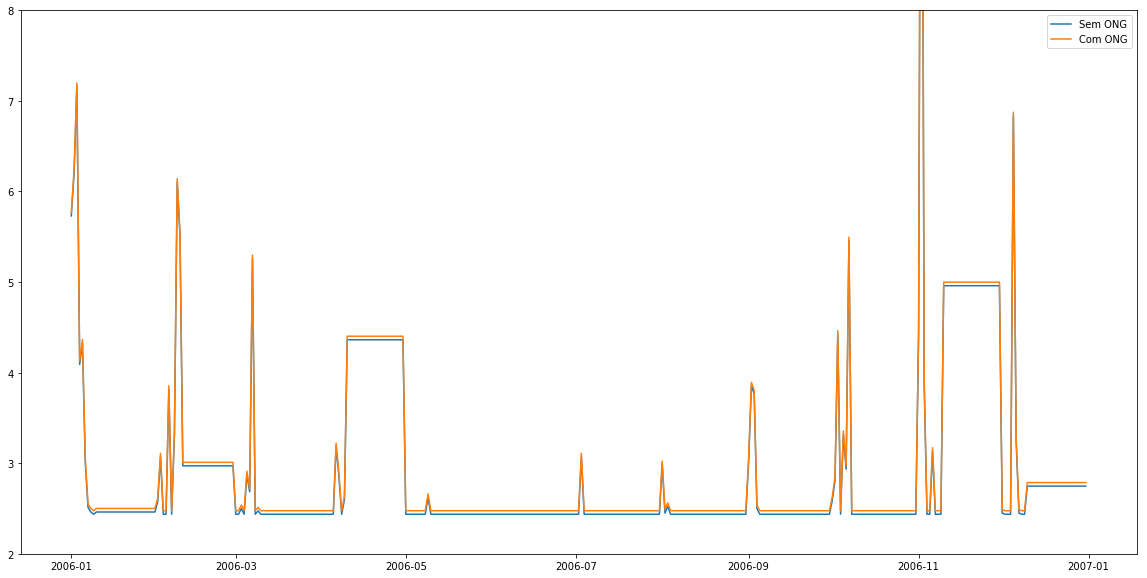

In [70]:
plt.figure(figsize=(20,10))
plt.plot(prediction0["data"],prediction0["prediction"])
plt.plot(prediction1["data"],prediction1["prediction"])
plt.legend(['Sem ONG','Com ONG'])
plt.ylim([2,8])
plt.show()